In [16]:
import pandas as pd
import numpy as np
from entity_recognition import get_locations

In [32]:
df = pd.read_csv('search-result-2022-11-08-04-04-19(1).csv')
df = df[['Type', 'Label', 'Headline', 'Body', 'Byline', 'Publish Date']]

df.head()

,Type,Label,Headline,Body,Byline,Publish Date
0,Article,Watertown Police Detective Alleges Hostile Wor...,Watertown Police Detective Alleges Hostile Wor...,BOSTON (AP) — A Watertown police detective all...,Associated Press,Wed Nov 18 14:39:02 EST 2020
1,Article,"In 2020, Larissa FastHorse's 'The Thanksgiving...","In 2020, Larissa FastHorse's 'The Thanksgiving...","In late October, Native American playwright <a...",Jill Kaufman,Fri Nov 20 16:34:53 EST 2020
2,Article,In From The Cold: Martha’s Vineyard To Open It...,In From The Cold: Martha’s Vineyard To Open It...,"For the past five winters, three Martha’s Vine...",Jennette Barnes,Tue Nov 24 15:48:23 EST 2020
3,Article,Retail Behemoth Amazon May Be Coming To The Si...,Retail Behemoth Amazon May Be Coming To The Si...,A site plan filed with the city of Worcester’s...,Aaron Schachter,Fri Nov 27 15:11:17 EST 2020
4,Article,Rollins Talking Criminal Justice With Biden Team,Rollins Talking Criminal Justice With Biden Team,While she said &quot;right now I&#39;m stickin...,Michael P. Norton | State House News Service,Mon Nov 30 08:49:08 EST 2020


In [33]:
df['combined_text'] = df.Label + df.Headline + df.Body
df['locations'] = df.apply(lambda row: get_locations(row.combined_text), axis = 1)

df.head()

,Type,Label,Headline,Body,Byline,Publish Date,combined_text,locations
0,Article,Watertown Police Detective Alleges Hostile Wor...,Watertown Police Detective Alleges Hostile Wor...,BOSTON (AP) — A Watertown police detective all...,Associated Press,Wed Nov 18 14:39:02 EST 2020,Watertown Police Detective Alleges Hostile Wor...,"{(Watertown, GPE), (Louison, GPE)}"
1,Article,"In 2020, Larissa FastHorse's 'The Thanksgiving...","In 2020, Larissa FastHorse's 'The Thanksgiving...","In late October, Native American playwright <a...",Jill Kaufman,Fri Nov 20 16:34:53 EST 2020,"In 2020, Larissa FastHorse's 'The Thanksgiving...","{(Vermont, GPE), (New Jersey, GPE), (Lenox, GP..."
2,Article,In From The Cold: Martha’s Vineyard To Open It...,In From The Cold: Martha’s Vineyard To Open It...,"For the past five winters, three Martha’s Vine...",Jennette Barnes,Tue Nov 24 15:48:23 EST 2020,In From The Cold: Martha’s Vineyard To Open It...,"{(Oak Bluffs, GPE), (homelessness.<br/><br/>Th..."
3,Article,Retail Behemoth Amazon May Be Coming To The Si...,Retail Behemoth Amazon May Be Coming To The Si...,A site plan filed with the city of Worcester’s...,Aaron Schachter,Fri Nov 27 15:11:17 EST 2020,Retail Behemoth Amazon May Be Coming To The Si...,"{(site.<br/><br/>“Though, GPE), (Boston, GPE),..."
4,Article,Rollins Talking Criminal Justice With Biden Team,Rollins Talking Criminal Justice With Biden Team,While she said &quot;right now I&#39;m stickin...,Michael P. Norton | State House News Service,Mon Nov 30 08:49:08 EST 2020,Rollins Talking Criminal Justice With Biden Te...,"{(Boston, GPE), (Washington, GPE), (Suffolk Co..."


In [34]:
df.to_csv('data_with_locations.csv')

In [35]:
#df = pd.read_csv('data_with_locations.csv')

In [86]:
def extract_locations(locations : pd.Series) -> pd.DataFrame:
    df = pd.DataFrame(columns = ['location', 'count'])
    
    for loc in locations:
        for val in loc:
            if val[0].lower() not in df['location'].values:
                new = {'location': val[0].lower(), 'count': 1}
                df = df.append(new, ignore_index = True)
            else:
                idx = df.index[df['location'] == val[0].lower()]
                df['count'].iloc[idx] += 1
    
    return df

In [87]:
import warnings
warnings.filterwarnings("ignore")

loc_df = extract_locations(df['locations'])

loc_df.head()

,location,count
0,watertown,4
1,louison,1
2,vermont,7
3,new jersey,8
4,lenox,1


In [93]:
invalid_chars = ['.', '/', '>', '<', '!', '?', '#', ';', ':', '1', '2', '3', '4', '5', '6', '7', '8' \
                 '9', '0', '(', ')']
idxs = []

for i in range(len(loc_df)):
    loc = loc_df['location'].iloc[i]
    for c in invalid_chars:
        if c in loc:
            idxs.append(i)
            
loc_df = loc_df.drop(labels=idxs, axis=0).reset_index(drop=True)
loc_df = loc_df.sort_values('count', ascending = False)

loc_df

,location,count
0,massachusetts,184
1,boston,119
2,the united states,45
3,new york,32
4,cambridge,28
...,...,...
283,duxbury,1
282,greece,1
281,nicaragua,1
280,san francisco state,1


<AxesSubplot:xlabel='location'>

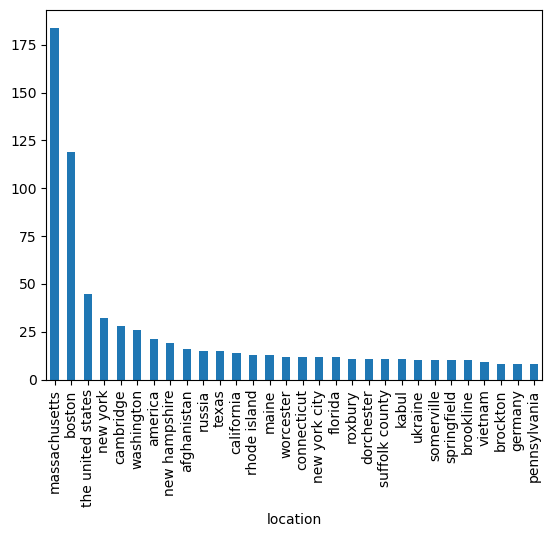

In [101]:
loc_df[:30].plot.bar(x = 'location', y = 'count', legend=False)

In [96]:
temp_loc_df = loc_df[(loc_df['location'] != 'massachusetts') & (loc_df['location'] != 'boston') & \
                     (loc_df['location'] != 'the united states') & (loc_df['location'] != 'new york') & \
                     (loc_df['location'] != 'america') & (loc_df['location'] != 'us')]

<AxesSubplot:xlabel='location'>

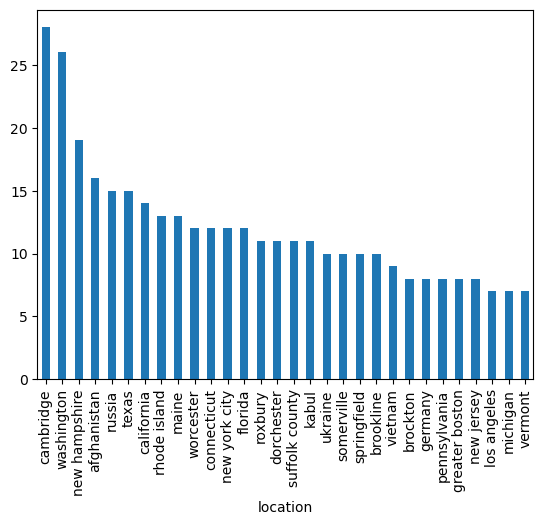

In [103]:
temp_loc_df[:30].plot.bar(x = 'location', y = 'count', legend = False)